In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rehamessa","key":"ae2ff69cbbe5aab2e5e74f9fc3297093"}'}

In [ ]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:

!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 743M/745M [00:04<00:00, 147MB/s]
100% 745M/745M [00:04<00:00, 161MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/covid19-radiography-database.zip"
with ZipFile(file_name , 'r')as zip:
  zip.extractall()
  print('done')

done


In [ ]:
!pip install split_folders

In [ ]:
import splitfolders as sf

In [ ]:
input_folder="/content/dataset"
output="/content"

In [ ]:
sf.ratio(input_folder,output="output",seed=42,ratio=(.8,.0,.2))

Copying files: 13808 files [00:03, 3614.68 files/s]


In [ ]:
import keras,os
from keras.models import *
from keras.layers import *
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
trdata=ImageDataGenerator()
Train_data=trdata.flow_from_directory(directory="/content/output/train",target_size=(224,224))
tsdata=ImageDataGenerator()
test_data=tsdata.flow_from_directory(directory="/content/output/test",target_size=(224,224))

Found 11045 images belonging to 2 classes.
Found 2763 images belonging to 2 classes.


In [ ]:
vgg19=keras.applications.vgg19
con_model=vgg19.VGG19(weights="imagenet",include_top=False,input_shape=(224,244,3))
for layer in con_model.layers:
  layer.trainable=False

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
x=keras.layers.Flatten()(con_model.output)
x=keras.layers.Dense(100,activation='relu')(x)
x=keras.layers.Dense(100,activation='relu')(x)
x=keras.layers.Dense(100,activation='relu')(x)
predictions=keras.layers.Dense(2,activation="softmax")(x)
full_model=keras.models.Model(inputs=con_model.input,outputs=predictions)

In [ ]:
full_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 61, 128)       0     

In [ ]:
full_model.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [ ]:
full_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 244, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 244, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 244, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 122, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 122, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 122, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 61, 128)       0     

In [ ]:
for layers in (model.layers)[:19]:
  print(layers)
  layers.trainable = False

In [ ]:
full_model.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpoint=ModelCheckpoint("vgg16_1.h5",monitor="val_accuracy",verbose=1,save_best_only=True,save_weights_only=False,mode="auto",period=1)
early=EarlyStopping(monitor="val_accuracy",min_delta=0,patience=15,verbose=1,mode="auto")
hist=full_model.fit_generator(steps_per_epoch=5,generator=Train_data,validation_data=test_data,validation_steps=1,epochs=50,callbacks=[checkpoint,early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
5/5 [==============================] - 39s 488ms/step - loss: 7.1459 - accuracy: 0.5312 - val_loss: 1.8000 - val_accuracy: 0.7188

Epoch 00001: val_accuracy improved from -inf to 0.71875, saving model to vgg16_1.h5
Epoch 2/50
5/5 [==============================] - 2s 400ms/step - loss: 2.6728 - accuracy: 0.6938 - val_loss: 0.9966 - val_accuracy: 0.7188

Epoch 00002: val_accuracy did not improve from 0.71875
Epoch 3/50
5/5 [==============================] - 2s 393ms/step - loss: 3.3787 - accuracy: 0.8000 - val_loss: 3.2542 - val_accuracy: 0.7188

Epoch 00003: val_accuracy did not improve from 0.71875
Epoch 4/50
5/5 [==============================] - 2s 389ms/step - loss: 1.9059 - accuracy: 0.7312 - val_loss: 0.3852 - val_accuracy: 0.9062

Epoch 00004: val_accuracy improved from 0.71875 to 0.90625, saving model to vgg16_1.h5
Epoch 5/50
5/5 [==============================] - 2s 397ms/step - loss: 1.6615 - accuracy: 0.8438 - val_loss: 0.9950 - val_accuracy: 0.7812

Epoch 00005: 

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

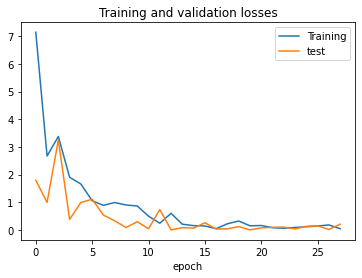

In [ ]:
hist.history.keys()
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.legend(["Training","test"])
plt.title("Training and validation losses")
plt.xlabel("epoch")